In [26]:
import torch
from matplotlib import pyplot as plt
from matplotlib.lines import lineStyles
from scipy.constants import point

from helpers import *
import seaborn as sns
df

,level_0,index,passage,gpt_labels_refs_bool,passage_tokens,diag_sep_passage,gpt_refs,gt_labels_refs_bool,att_rollout,grad_sam_scores,...,grad_sam_scores_agg_2,grad_sam_scores_agg_3,running_threshold,att_rollout_p,grad_sam_scores_p,att_cat_scores_p,mean_att_all_p,mean_att_last_layer_p,scores_random_p,att_cat_scores_agg_3
0,0,0,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0143), tensor(0.0026), tensor(0.0036...","[tensor(4.3173e-06), tensor(2.4501e-06), tenso...",...,"[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(0.0417), tensor(0.0076), tensor(0.0106...","[tensor(0.0362), tensor(0.0205), tensor(0.0474...","[tensor(0.0058), tensor(0.0090), tensor(0.), t...","[tensor(0.0507), tensor(0.0419), tensor(0.0425...","[tensor(0.1024), tensor(0.0897), tensor(0.0970...","[tensor(0.0128), tensor(0.0130), tensor(0.0147...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
1,1,1,Pay insurance lapse civil penalty // Pay ins...,"[True, True, True, True, True, False, False, T...","[Pay, insurance, lapse, civil, penalty, /, /, ...",My insurance ended so what should i do[SEP]Pay...,[{'ref_span': 'Pay insurance lapse civil penal...,None,"[tensor(0.0112), tensor(0.0089), tensor(0.0070...","[tensor(4.5446e-06), tensor(3.7075e-06), tenso...",...,"[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(0.0823), tensor(0.0650), tensor(0.0509...","[tensor(0.0787), tensor(0.0642), tensor(0.0969...","[tensor(0.), tensor(0.0638), tensor(0.0948), t...","[tensor(0.0601), tensor(0.0520), tensor(0.0488...","[tensor(0.1130), tensor(0.1858), tensor(0.0828...","[tensor(0.0450), tensor(0.1237), tensor(0.0268...","[tensor(0.), tensor(0.1250), tensor(1.), tenso..."
2,2,2,Top 5 DMV Mistakes and How to Avoid Them // ...,"[False, False, False, False, False, False, Fal...","[Top, 5, DMV, Mistakes, and, How, to, Avoid, T...",My insurance ended so what should i do[SEP]Top...,[{'ref_span': 'Make sure you turn in your vehi...,"[False, False, False, False, False, False, Fal...","[tensor(0.0085), tensor(0.0022), tensor(0.0022...","[tensor(2.0746e-06), tensor(1.7868e-06), tenso...",...,"[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(0.0212), tensor(0.0055), tensor(0.0055...","[tensor(0.0250), tensor(0.0215), tensor(0.0535...","[tensor(0.0034), tensor(0.0050), tensor(0.), t...","[tensor(0.0431), tensor(0.0432), tensor(0.0464...","[tensor(0.0893), tensor(0.0739), tensor(0.0639...","[tensor(0.0004), tensor(0.0064), tensor(0.0063...","[tensor(0.), tensor(0.0045), tensor(0.), tenso..."
3,3,3,Respond to DMV insurance letters and orders //...,"[False, False, False, False, False, False, Fal...","[Respond, to, DMV, insurance, letters, and, or...",My insurance ended so what should i do[SEP]Res...,[{'ref_span': 'surrender your vehicle registra...,None,"[tensor(0.0238), tensor(0.0064), tensor(0.0090...","[tensor(1.0645e-06), tensor(7.3783e-07), tenso...",...,"[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1.), tensor(0.5000), tensor(0.3333), t...","[tensor(1), tensor(1), tensor(1), tensor(1), t...","[tensor(0.1229), tensor(0.0332), tensor(0.0463...","[tensor(0.0680), tensor(0.0471), tensor(0.0797...","[tensor(0.0287), tensor(0.0409), tensor(0.), t...","[tensor(0.0917), tensor(0.1110), tensor(0.0588...","[tensor(0.1919), tensor(0.1056), tensor(0.1881...","[tensor(0.0781), tensor(0.0069), tensor(0.0323...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
4,4,4,Insurance lapses // What will happen if I dr...,"[False, 

In [27]:

record_rnd = df.iloc[33]


print("\n\n")
show_highlighted_passage(record_rnd, record_rnd["gt_labels_refs_bool"], record_rnd["grad_sam_scores"])


In [28]:

def prep_signal(signal):
    return signal.numpy(), torch.cumsum(signal, dim=-1).numpy()


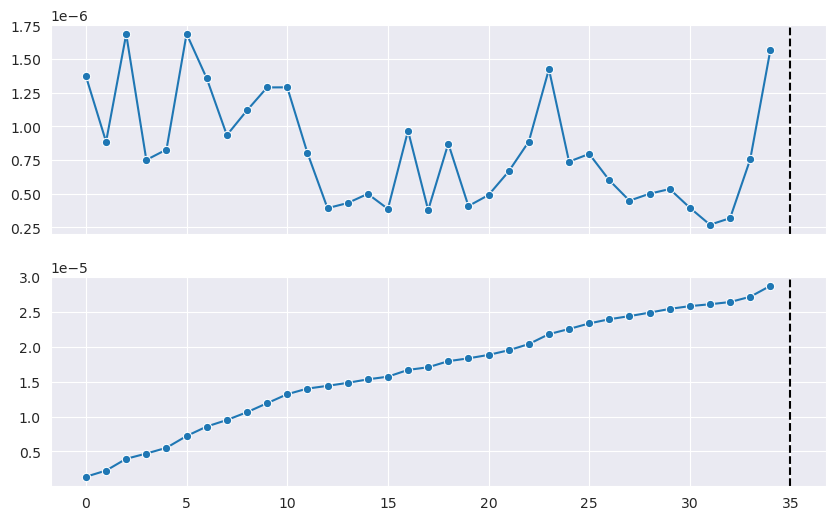

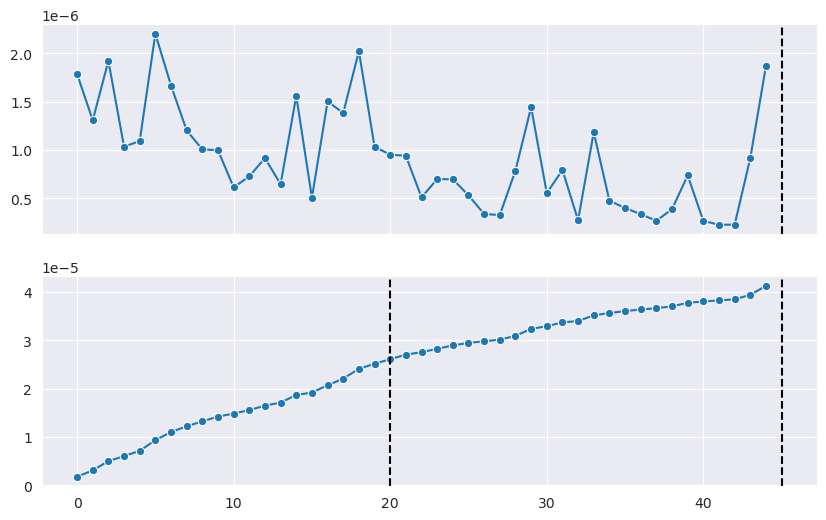

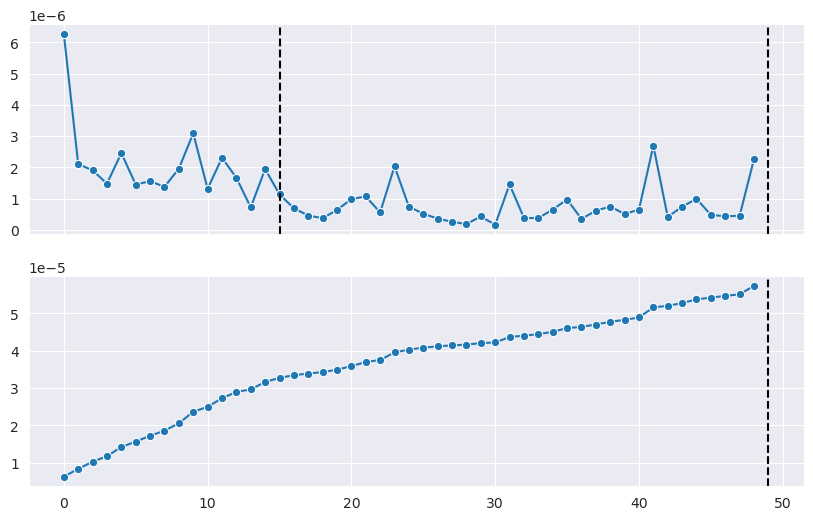

In [46]:
import ruptures as rpt
from matplotlib import pyplot as plt


def fit_plot_signal(signal, ax, penalty=12):
    # algo = rpt.Pelt(model="rbf").fit(signal)
    algo = rpt.Binseg(model="rbf").fit(signal)
    result = algo.predict(pen=penalty)
    
    sns.lineplot(signal, ax=ax, marker="o")
    for r in result:
        ax.axvline(x=r, color="k", linestyle="--")
        
def show_detect(record, scores_label, penalty=12, penalty_cumsum=12):
    scores = record[scores_label]
    show_highlighted_passage(record_rnd, record_rnd["gt_labels_refs_bool"], scores)
    signal, signal_cumsum = prep_signal(scores)
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
    fit_plot_signal(signal, axs[0], penalty=penalty)
    fit_plot_signal(signal_cumsum, axs[1], penalty=penalty_cumsum)
    plt.show()

for record_id in [33, 34, 35]:
    record_rnd = df.iloc[record_id]
    show_detect(record_rnd, "grad_sam_scores", penalty=5, penalty_cumsum=12)
    print("\n\n\n")

In [ ]:
## Optimization
# P = penalty
# S = slope change